## Bike Sharing Demand datasets

|변수|설명|
|--|--|
|datetime|hourly date + timestamp|
|season|1=봄, 2=여름, 3=가을, 4=겨울|
|holiday|1=토,일요일을 제외한 국경일 등의 휴일<br> 0=휴일이 아닌 날|
|workingday|1=토, 일요일의 주말 및 휴일이 아닌 주중<br> 0=주말 및 휴일|
|weather|1 = 맑음, 약간 구름 낀 흐림. <br> 2= 안개,안개+흐림 <br> 3=가벼운 눈, 가벼운 비+천둥 <br> 4=심한 눈/비, 천둥/번개|
|temp|온도(섭씨)|
|atemp|체감온도(섭씨)|
|humidity|상대습도|
|windspeed|풍속|
|casual|사전에 등록되지 않는 사용자가 대여한 횟수|
|registered|사전에 등록된 사용자가 대여한 횟수|
|count|대여횟수|

### 1. 패키지 설치 및 데이터 로드

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

bike_df = pd.read_csv(r'C:\Users\hanjieun_2\Desktop\개인공부\algorithms\1.ML\1.Supervised_Learning\2.Estimation\datasets\bike_train.csv')
print(bike_df.shape)
bike_df.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


> null값은 없으며, 대부분이 int.float형. datetime만 object형

> Datetime칼럼 전처리 필요(object타입-> Datetime타입으로 변환)

### 2. 전처리

In [4]:
# 문자열을 datetime 타입으로 변경
bike_df['datetime'] = bike_df.datetime.apply(pd.to_datetime)

# datetime 타입에서 년, 월, 일, 시간 추출
bike_df['year'] = bike_df.datetime.apply(lambda x : x.year)
bike_df['month'] = bike_df.datetime.apply(lambda x : x.month)
bike_df['day'] = bike_df.datetime.apply(lambda x : x.day)
bike_df['hour'] = bike_df.datetime.apply(lambda x : x.hour)
bike_df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2


In [7]:
bike_df.drop(['datetime', 'casual', 'registered'], axis=1, inplace=True)

> casual + registered = count이므로 casual과 registered 삭제(상관도가 높으므로)

In [8]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   count       10886 non-null  int64  
 9   year        10886 non-null  int64  
 10  month       10886 non-null  int64  
 11  day         10886 non-null  int64  
 12  hour        10886 non-null  int64  
dtypes: float64(3), int64(10)
memory usage: 1.1 MB


### 3. EDA

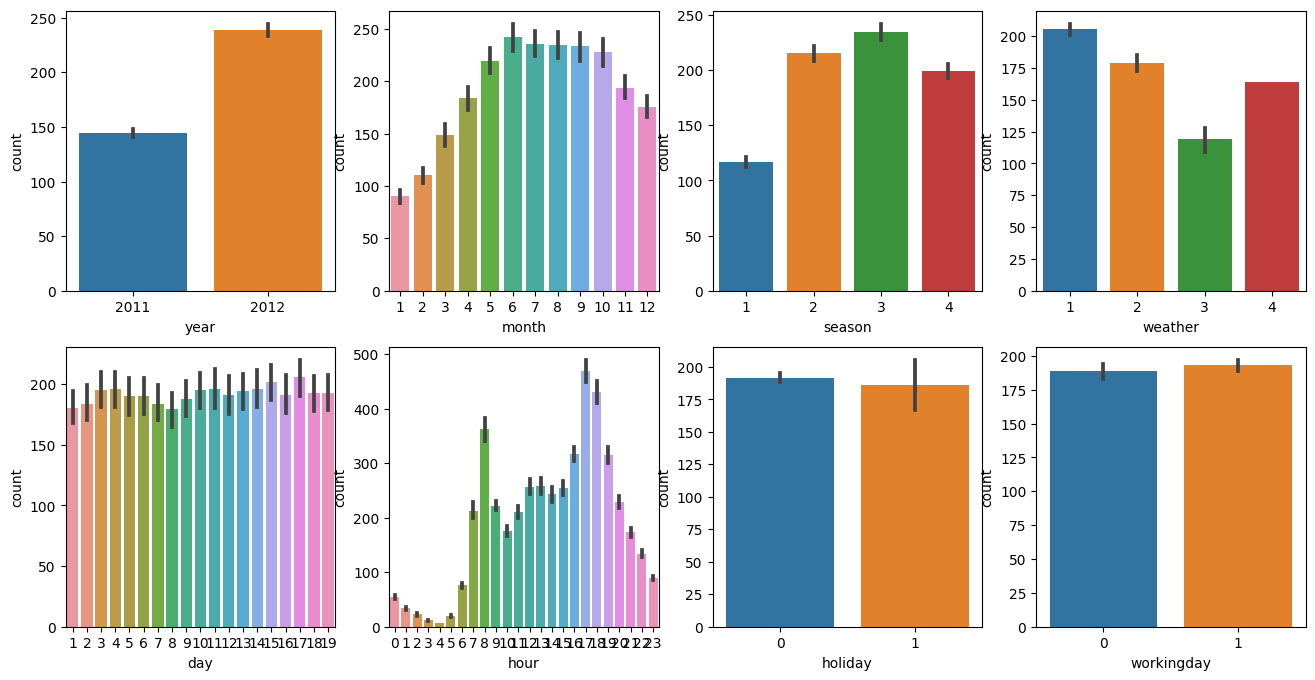

In [9]:
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
cat_features = ['year', 'month', 'season', 'weather', 'day', 'hour', 'holiday', 'workingday']

# cat_features에 있는 모든 칼럼별로 개별 칼럼값에 따른 count의 합을 barplot으로 시각화
for i, feature in enumerate(cat_features):
    row = int(i/4)
    col = i%4
    sb.barplot(x=feature, y='count', data=bike_df, ax=axs[row][col])

> year(년도)별 count를 보면 2012년이 2011년보다 상대적으로 값이 높다. 이는 year 자체가 특별한 의미가 있어서라기보다는 시간이 지나면서 자전거 대여 횟수가 지속적으로 증가한 결과라고 여겨질 수 있다. 

> month(월별)의 경우 1,2,3월이 낟고 6,7,8,9월이 높다. 

> season(계절)의 경우 봄(1), 겨울(4)가 낮고, 여름(2), 가을(3)이 높다.

> weather(날씨)의 경우 눈 또는 비가 있는 경우(3,4)가 낮고, 맑거나(1) 약간 안개가 있는 경우(2)가 높다.

> hour(시간)의 경우 오전 출근시간(8)과 오후 퇴근시간(17,18)이 상대적으로 높다.

> day(일자)간의 차이는 크지 않다.

> holiday(휴일여부) 또는 workingday(주중여부)는 주중일 경우(즉, holiday는 0, workingday는 1)가 상대적으로 약간 높다.

### 4. Linear Regression 모델링 및 평가
- 요구된 평가방법 : RMSLE = Root Mean Square Log Error

#### 평가지표 함수들

In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# log 값 변환 시 NaN 등의 이슈로 log()가 아닌 log1p()(=log(1+x))를 이용해 RMSLE 계산
def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

# 사이킷런의 mean_squared_error()를 이용해 RMSE 계산
def rmse(y, pred):
    return np.sqrt(mean_squared_error(y, pred))

# MSEm RMSE, RMSLE를 모두 계산
def evaluate_regr(y, pred):
    rmsle_val = rmsle(y, pred)
    rmse_val = rmse(y, pred)
    # MAE는 사이킷런의 mean_absolute_error()로 계산
    mae_val = mean_absolute_error(y, pred)
    print('RMSLE:{0:.3f}, RMSE:{1:.3f}, MAE:{2:.3f}'.format(rmsle_val, rmse_val, mae_val))

#### 모델링

In [13]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

y_target = bike_df['count']
X_features = bike_df.drop('count', axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

pred = lr_reg.predict(X_test)

evaluate_regr(y_test, pred)

RMSLE:1.165, RMSE:140.900, MAE:105.924


> 오차가 크다;;

In [14]:
def get_top_error_data(y_test, pred, n_tops=5):
    # DataFrame의 칼럼으로 실제 대여횟수(count)와 예측값을 서로 비교할 수 있도록 생성.
    result_df = pd.DataFrame(y_test.values, columns=['real_count'])
    result_df['predicted_count'] = np.round(pred)
    result_df['diff'] = np.abs(result_df['real_count']-result_df['predicted_count'])

    # 예측값과 실제값이 가장 큰 데이터 순으로 출력.
    print(result_df.sort_values('diff', ascending=False)[:n_tops])

get_top_error_data(y_test, pred, n_tops=5)

      real_count  predicted_count   diff
1618         890            322.0  568.0
3151         798            241.0  557.0
966          884            327.0  557.0
412          745            194.0  551.0
2817         856            310.0  546.0


> 회귀에서 이렇게 큰 예측 오류가 발생한 경우 가장 먼저 살펴볼 것은 Target 값의 분포가 왜곡된 형태를 이루고 있는지 확인하는 것.

> Target 값의 분포는 정규 분포 형태가 가장 좋다. 그렇지 않고 왜곡된 경우에는 회귀 예측 성능이 저하되는 경우가 발생하기 쉽다. 

### 5. Target값 분포 확인해보기

<Axes: >

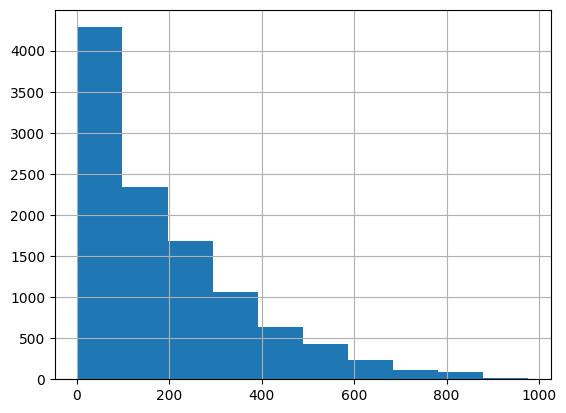

In [15]:
y_target.hist()

> count의 칼럼값이 정규분포가 아닌 0~200 사이에 왜곡되어 있다. 이렇게 **왜곡된 값을 정규분포 형태로 바꾸는 가장 일반적인 방법은 로그를 적용해 변환하는 것이다.**  

<Axes: >

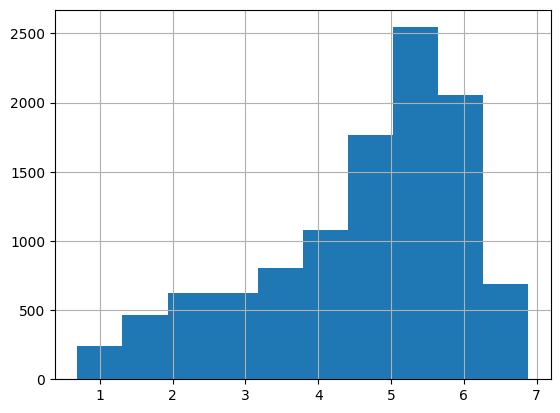

In [16]:
y_log_transform = np.log1p(y_target)
y_log_transform.hist()

> 로그 변환 이후, 왜곡의 정도가 많이 향상되었다.

### 6. 타겟값 로그 변환 이후, 다시 모델링 및 평가

In [17]:
# 타깃 칼럼인 count 값을 log1p로 로그 변환
y_target_log = np.log1p(y_target)

# 로그 변환된 y_target_log를 반영해 학습/테스트 데이터 세트 분할
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target_log, test_size=0.3, random_state=0)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

pred = lr_reg.predict(X_test)

#테스트 데이터 세트의 Target값은 로그 변환됐으므로 다시 expm1을 이용해 원래 스케일로 변환
y_test_exp = np.expm1(y_test)

# 예측값 역시 로그 변환된 타깃 기반으로 학습돼 예측됐으므로 다시 expm1로 스케일 변환
pred_exp = np.expm1(pred)

evaluate_regr(y_test_exp, pred_exp)

RMSLE:1.017, RMSE:162.594, MAE:109.286


> RMSLE 오류는 줄어들었지만, RMSE는 오히려 더 늘어났다. 각 피처의 회귀계숫값 확인해보기

<Axes: >

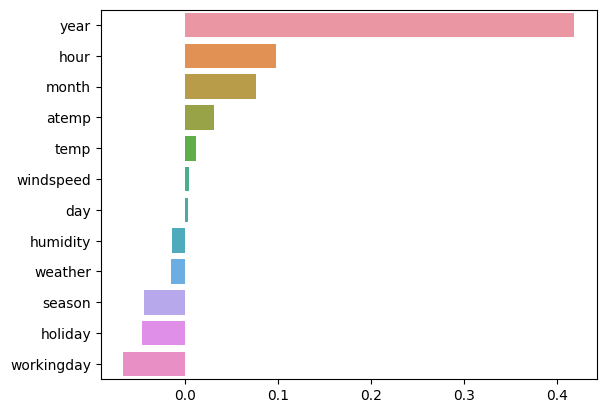

In [18]:
coef = pd.Series(lr_reg.coef_, index=X_features.columns)
coef_sort = coef.sort_values(ascending=False)
sb.barplot(x=coef_sort.values, y=coef_sort.index)

> year, hour, month, season, holiday, workingday 피처들의 회귀 계수 영향도가 상대적으로 높다. year은 2011, 2012 값으로, month는 1,2,3,4,5,6,7,8,9,10,11,12와 같이 숫잣값 형태로 의미를 담고 있다. 하지만 이들 피처들의 경우 개별 숫자값의 크기가 의미 있는 것은 아니다. 

> year의 경우 단순히 연도를 뜻하는 것이므로 2012라는 값이 2011보다 큰 값으로 인식되어서는 안된다. 즉, year, hour, month 등은 숫자 값으로 표현되었지만 이들은 모두 카테고리(Category)형 피처이다.

> 사이킷런은 카테고리만을 위한 데이터 타입은 없으며, 모두 숫자로 변환해야한다. 하지만 이처럼 숫자형 카테고리 형을 선형 회귀에 사용할 경우 회귀 계수를 연산할 때 이 숫자형 값에 크게 영향을 받는 경우가 발생할 수 있다. 따라서 선형회귀에서는 이러한 피처 인코딩에 `원-핫-인코딩`을 적용해 변환해야 한다. 

### 7. 카테고리형 피처들 One-hot-Encoding 적용

In [19]:
# year, month, day, hour 등의 피처들을 one hot encoding
X_features_ohe = pd.get_dummies(X_features, columns=['year', 'month', 'day', 'hour', 'holiday', 
                                                     'workingday', 'season', 'weather'])

In [26]:
len(X_features_ohe.columns)

73

### 8. 다시 Linear regression 모델링 진행

In [20]:
# 원-핫 인코딩이 적용된 피처 데이터 세트 기반으로 학습/예측 데이터 분할.
X_train, X_test, y_train, y_test = train_test_split(X_features_ohe, y_target_log,
                                                    test_size=0.3, random_state=0)

# 모델과 학습/테스트 데이터 세트를 입력하면 성능 평가 수치를 반환
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1:
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print('###', model.__class__.__name__, '###')
    evaluate_regr(y_test, pred)
# end of function get_model_predict
    
# 모델별로 평가 수행
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.01)

for model in [lr_reg, ridge_reg, lasso_reg]:
    get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=True)

### LinearRegression ###
RMSLE:0.590, RMSE:97.688, MAE:63.382
### Ridge ###
RMSLE:0.590, RMSE:98.529, MAE:63.893
### Lasso ###
RMSLE:0.635, RMSE:113.219, MAE:72.803


> 원핫인코딩을 적용한 뒤, 선형회귀 예측 성능이 많이 향상되었다.

<Axes: >

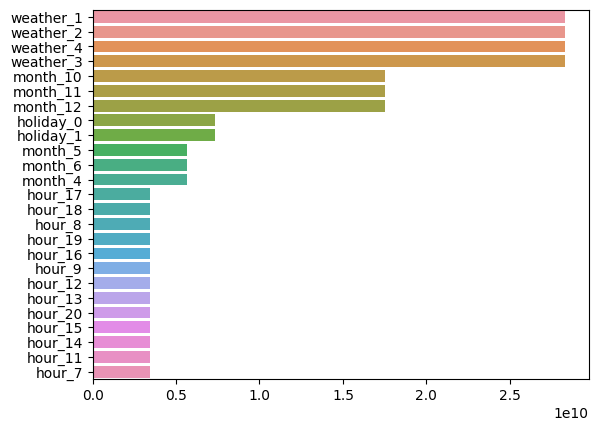

In [29]:
# 회귀계수가 높은 피처 시각화하기
coef = pd.Series(lr_reg.coef_, index=X_features_ohe.columns)
coef_sort = coef.sort_values(ascending=False)[:25]
sb.barplot(x=coef_sort.values, y=coef_sort.index)

### 8-1. RandomForestRegressor, GradientBoostingRegressor, XGBoostingRegressor, LightGBMRegressor

In [30]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# 랜덤포레스트, GBM, XGBoost, LightGBM model별로 평가 수행
rf_reg = RandomForestRegressor(n_estimators=500)
gbm_reg = GradientBoostingRegressor(n_estimators=500)
xgb_reg = XGBRegressor(n_estimators =500)
lgb_reg = LGBMRegressor(n_estimatiors=500)

for model in [rf_reg, gbm_reg, xgb_reg, lgb_reg]:
    # XGBoost의 경우 DataFrame이 입력될 경우 버전에 따라 오류 발생 가능. ndarray로 변환.
    get_model_predict(model, X_train.values, X_test.values, y_train.values, y_test.values, is_expm1=True)

### RandomForestRegressor ###
RMSLE:0.354, RMSE:50.298, MAE:31.108
### GradientBoostingRegressor ###
RMSLE:0.330, RMSE:53.373, MAE:32.758
### XGBRegressor ###
RMSLE:0.339, RMSE:51.475, MAE:31.357
[LightGBM] [Warning] Unknown parameter: n_estimatiors
[LightGBM] [Warning] Unknown parameter: n_estimatiors
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000530 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 348
[LightGBM] [Info] Number of data points in the train set: 7620, number of used features: 72
[LightGBM] [Info] Start training from score 4.582043
[LightGBM] [Warning] Unknown parameter: n_estimatiors
### LGBMRegressor ###
RMSLE:0.332, RMSE:51.381, MAE:31.833
